In [1]:
import numpy as np
from graphviz import Digraph, Graph

In [130]:
class Node: 
    def __init__(self, value):
        self.value = value
        self.leftchild = None
        self.rightchild = None
        
    def add_children(self, left=None, right=None):
        if left:
            self.leftchild = left
        if right:
            self.rightchild = right

def get_basic_btree():
    root = Node(8)
    # level 1
    left1 = Node(4)
    right1 = Node(10)
    root.add_children(left=left1, right=right1)

    # level 2
    left2a = Node(2)
    right2b = Node(6)
    left2c = Node(16)
    right2d = Node(11)
    
    
    left1.add_children(left=left2a, right=right2b)
    right1.add_children(left=left2c, right=right2d)
    
    
    # level 3
    left3a = Node(20)
    right3b = Node(7)
    left3c = Node(12)
    right3d = Node(3)
    left3e = Node(27)
    
    left2a.add_children(left=left3a, right=right3b)
    right2b.add_children(left=left3c, right=right3d)
    left2c.add_children(left=left3e)
    return root

def get_basic_array_tree(complete=True):
    arr_tree = [8, 4, 10, 2, 6, 16, 11, 20, 7, 12, 3]
    if complete:
        return arr_tree + [27]
    else:
        return arr_tree + [None, 27]

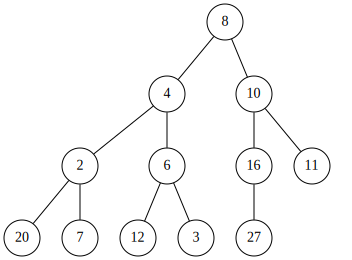

In [85]:
def level_order_grf_bld(node, grf):
    node_stack = [(node, None)]
    
    n_idx = 0
    while len(node_stack) > 0:            
        n, p_idx = node_stack.pop()
        
        if n_idx == 0:
            grf.node(str(n_idx), str(n.value), shape="circle", fixedsize="true")
        elif n:
            grf.node(str(n_idx), str(n.value), shape="circle", fixedsize="true")
            grf.edge(str(p_idx), str(n_idx))
        else:
            grf.node(str(n_idx), shape="none", style="invisible")
            grf.edge(str(p_idx), str(n_idx), style="invisible")
        
        if n and n.leftchild and n.rightchild:
            node_stack.insert(0, (n.leftchild, n_idx))
            node_stack.insert(0, (n.rightchild, n_idx))
        elif n and not n.leftchild and n.rightchild:
            node_stack.insert(0, (None, n_idx))
            node_stack.insert(0, (n.rightchild, n_idx))
        elif n and n.leftchild and not n.rightchild:
            node_stack.insert(0, (n.leftchild, n_idx))
            node_stack.insert(0, (None, n_idx))
        
        n_idx+=1
        

def print_tree(root):
    grf = Graph(format="png", graph_attr={'nodesep': '.3'})
    level_order_grf_bld(root, grf)
    
    return grf
    
root = get_basic_btree()
grf = print_tree(root)
grf

# Types of Trees

## Balanced Binary Tree
A binary tree, each node has up to two children, whose height is $O(log(n)) \rightarrow$ Provides $O(log(n))$ time for insertion, deletion, and search

## Binary Search Tree
A binary tree which every node has the relationship $\text{node}_{\text{leftchild}} \leq \text{node}_{\text{root}} < \text{node}_{\text{rightchild}}$  

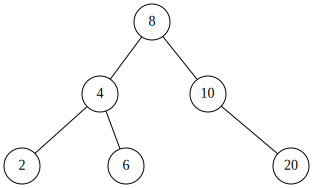

In [42]:
grf = Graph(format="png", graph_attr={'nodesep': '.1'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6a", "-1", shape="none", style="invisible")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("6", "20", shape="circle", fixedsize="true")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6a", style="invisible")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "6")

grf

## Complete Binary Tree
A binary tree in which every level of the tree is fully filled, except for perhaps the last level which would be filled from left to right.  


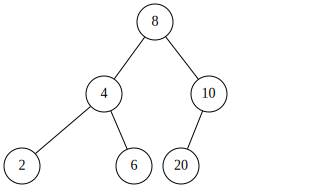

In [45]:
grf = Graph(format="png", graph_attr={'nodesep': '.15'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6", "20", shape="circle", fixedsize="true")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("6c", "-1", shape="none", style="invisible")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "6c", style="invisible")

grf

### Properties of Complete Binary Tree
Given node $i$ for a complete binary tree with $n$ nodes:
* Left-child index = $2i + 1$
* Right-child index = $2i + 2$
* Parent index = $\left\lfloor{\dfrac{i-1}{2}}\right\rfloor$
* Height of Tree = $\left\lceil{log_2(n+1)}\right\rceil - 1$, where a tree of just a root is height 0
* Max number of nodes on level $l$ is $max\_nodes = 2^l$
* Min number of nodes of tree with height $h$ is $ min\_nodes = 2^h$

## Full Binary Tree
A full binary tree is a binary tree in which every node has either zero children or two children.

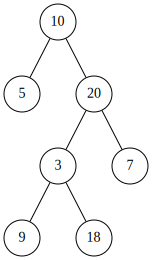

In [48]:
grf = Graph(format="png", graph_attr={'nodesep': '.5'})

grf.node("1", "10", shape="circle", fixedsize="true")
grf.node("2", "5", shape="circle", fixedsize="true")
grf.node("3", "20", shape="circle", fixedsize="true")
grf.node("4", "3", shape="circle", fixedsize="true")
grf.node("5", "7", shape="circle", fixedsize="true")
grf.node("6", "9", shape="circle", fixedsize="true")
grf.node("7", "18", shape="circle", fixedsize="true")

grf.edges(["12", "13", "34", "35", "46", "47"])

grf

## Perfect Binary Tree

A perfect binary tree is one where all interior nodes have 2 children and all left nodes are at the same level. 

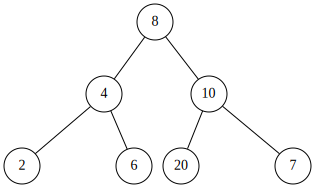

In [50]:
grf = Graph(format="png", graph_attr={'nodesep': '.15'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6", "20", shape="circle", fixedsize="true")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("7", "7", shape="circle", fixedsize="true")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "7")

grf

# Binary Tree Traversal

## Level Traversal

        

In [131]:
# class based
def level_traversal(node, visited):
    node_queue = [node]
    while len(node_queue) > 0:
        n = node_queue.pop()
        visited.append(n.value)
        if n.leftchild: node_queue.insert(0, n.leftchild)
        if n.rightchild: node_queue.insert(0, n.rightchild)

visited = []
root = get_basic_btree()
level_traversal(root, visited)
print(visited)

[8, 4, 10, 2, 6, 16, 11, 20, 7, 12, 3, 27]


In [135]:
# list based
def level_traversal_tree_array(arr):
    visited = []
    for node in arr:
        if node:
            visited.append(node)
    print(visited)
    
arr = get_basic_array_tree(complete=False)
level_traversal_tree_array(arr)

[8, 4, 10, 2, 6, 16, 11, 20, 7, 12, 3, 27]


## In-Order Traversal: left-current-right

In [87]:
def in_order_traversal(node, visited):
    if node.leftchild:
        in_order_traversal(node.leftchild, visited)
    visited.append(node.value)
    if node.rightchild:
        in_order_traversal(node.rightchild, visited)

visited = []
root = get_basic_btree()
in_order_traversal(root, visited)
print(visited)

[20, 2, 7, 4, 12, 6, 3, 8, 27, 16, 10, 11]


In [138]:
def in_order_traversal_tree_array(arr, max_els, visited, idx=0):
    # left child exists if index value is not greater than max index and value is not None
    if 2*idx + 1 <= max_els and arr[2*idx + 1] is not None:
        in_order_traversal_tree_array(arr, max_els, visited, 2*idx+1)
    visited.append(arr[idx])
    if 2*idx + 2 <= max_els and arr[2*idx + 2] is not None:
        in_order_traversal_tree_array(arr, max_els, visited, 2*idx+2)
            
visited = []
array_tree = get_basic_array_tree(complete=True)
in_order_traversal_tree_array(array_tree, len(array_tree)-1, visited)
print(visited)

visited = []
array_tree = get_basic_array_tree(complete=False)
in_order_traversal_tree_array(array_tree, len(array_tree)-1, visited)

[20, 2, 7, 4, 12, 6, 3, 8, 27, 16, 10, 11]


## Pre-Order Traversal: current-left-right

In [88]:
def pre_order_traversal(node, visited):
    visited.append(node.value)
    if node.leftchild:
        pre_order_traversal(node.leftchild, visited)
    if node.rightchild:
        pre_order_traversal(node.rightchild, visited)

visited = []
root = get_basic_btree()
pre_order_traversal(root, visited)
print(visited)

[8, 4, 2, 20, 7, 6, 12, 3, 10, 16, 27, 11]


## Post-Order Traversal: left-right-current

In [89]:
def post_order_traversal(node, visited):
    if node.leftchild:
        post_order_traversal(node.leftchild, visited)
    if node.rightchild:
        post_order_traversal(node.rightchild, visited)
    visited.append(node.value)

visited = []
root = get_basic_btree()
post_order_traversal(root, visited)
print(visited)

[20, 7, 2, 12, 3, 6, 4, 27, 16, 11, 10, 8]


# Min Heap Using Node Class

A complete binary tree where each node is smaller than its children. Similar for Max heap

## Build a Min Heap

Start


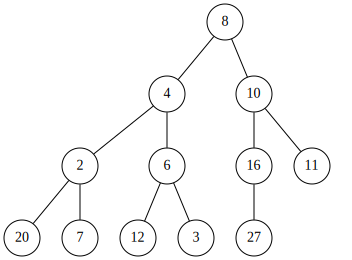

In [153]:
def minheap_it_up(node):
    # If not a leaf
    if node.leftchild or node.rightchild:
        min_n = node
        if node.leftchild and min_n.value > node.leftchild.value:
            min_n = node.leftchild
        if node.rightchild and min_n.value > node.rightchild.value:
            min_n = node.rightchild
        
        if min_n != node:
            node_v = node.value
            node.value = min_n.value
            min_n.value = node_v
            minheap_it_up(min_n)
            
def level_order_on_stack(node, stack):
    node_queue = [node]
    while len(node_queue) > 0:
        n = node_queue.pop()
        stack.insert(0, n)
        if n.leftchild: node_queue.insert(0, n.leftchild)
        if n.rightchild: node_queue.insert(0, n.rightchild)
        
def build_min_heap(root):
    node_stack = []
    level_order_on_stack(root, node_stack)
    # Get parent of last leaf node
    while node_stack[0].leftchild is None and node_stack[0].rightchild is None:
        _ = node_stack.pop(0)
    
    # Ensure min-heap property on all interior nodes up to root
    for node in node_stack:
        minheap_it_up(node)
    
root = get_basic_btree()
grf_prev =print_tree(root)
print("Start")
grf_prev

Min Heap


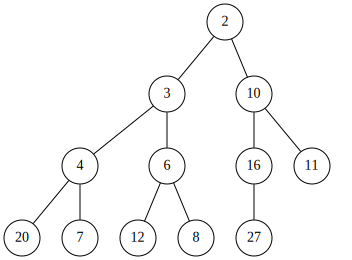

In [150]:
build_min_heap(root)
grf_min_heap = print_tree(root)
print("Min Heap")
grf_min_heap

## Extract Min Element and Maintain Heap

In [151]:
# using root from above that is a min heap
def get_min_heap_element(root):
    stack = []
    level_order_on_stack(root, stack)

    # Move last element, right most leaf to root
    last_node = stack.pop(0)
    
    # Remove parent link
    while stack[0].leftchild != last_node and stack[0].rightchild != last_node:
        _ = stack.pop(0)
    
    if stack[0].leftchild == last_node:
        stack[0].leftchild = None
    else:
        stack[0].rightchild = None
    
    # Add root's children to new root and remove links from old root
    last_node.leftchild = root.leftchild
    last_node.rightchild = root.rightchild
    
    root.leftchild = None
    root.rightchild = None
    
    #Call minheap it up at root
    minheap_it_up(last_node)
    
    return root, last_node

min_node, new_root = get_min_heap_element(root)

Min Element: 2


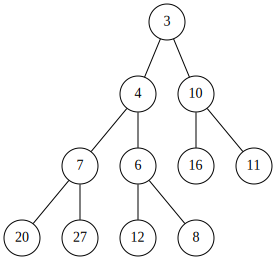

In [152]:
grf = print_tree(new_root)
print(f"Min Element: {min_node.value}")
grf

## Insert Element Maintain Heap

In [158]:
# Using original min heap created above
def insert_into_minheap(root, new_node):
    # find parent of last node
    node_stack = []
    level_order_on_stack(root, node_stack)
    
    # Search from second to last node to find parent of last node, i.e. last leaf-node
    for i in range(1, len(node_stack)):
        if node_stack[i].leftchild == node_stack[0] or node_stack[i].rightchild == node_stack[0]:
            break
    
    num_nodes = len(node_stack)
    # Insert to parent's right if space
    if node_stack[i].leftchild == node_stack[0]:
        node_stack[i].rightchild = new_node
    # search from root to find first node with no children
    else:  
        for i in range(len(node_stack)-1, -1, -1):
            if not node_stack[i].leftchild and not node_stack[i].rightchild:
                break
        node_stack[i].leftchild = new_node
    
    # From parent of new node, move up towards root
    for j in range(i, len(node_stack)):
        minheap_it_up(node_stack[j])
    

In [159]:
node = Node(5)
insert_into_minheap(new_root, node)

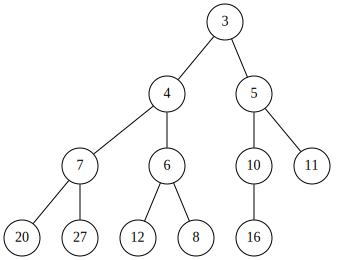

In [160]:
print_tree(new_root)

# Min Heap Using Array Representation

## Build a Min Heap

In [156]:
def minheap_it_up_from_array(arr, idx):
    min_idx = idx
    num_els = len(arr) - 1
    if 2*idx + 1 <= num_els and arr[2*idx+1]  < arr[min_idx]:
        min_idx = 2*idx + 1
    if 2*idx + 2 <= num_els and arr[2*idx + 2] < arr[min_idx]:
        min_idx = 2*idx + 2
        
    if min_idx != idx:
        val = arr[idx]
        arr[idx] = arr[min_idx]
        arr[min_idx] = val
        minheap_it_up_from_array(arr, min_idx)

def build_min_heap_from_array(arr):
    last_idx = len(arr) - 1
    # parent of idx is floor((id - 1)/2)
    parent_idx = int((last_idx - 1)/2)
    for idx in range(parent_idx, -1, -1):
        minheap_it_up_from_array(arr, idx)
    
arr = get_basic_array_tree(complete=True)
build_min_heap_from_array(arr)
print(arr)

[2, 3, 10, 4, 6, 16, 11, 20, 7, 12, 8, 27]


## Get Min Element And Maintain Heap

In [157]:
def get_min_from_array_heap(arr):
    min_el = arr.pop(0)
    last_leaf = arr.pop()
    arr.insert(0, last_leaf)
    
    minheap_it_up_from_array(arr, 0)
            
    return min_el

min_el = get_min_from_array_heap(arr)
print(f"Min {min_el}\n {arr}")

Min 2
 [3, 4, 10, 7, 6, 16, 11, 20, 27, 12, 8]


## Insert New Element and Maintain Heap

In [161]:
def insert_new_elment_in_heap_array(arr, val):
    arr.append(val)
    last_ind = len(arr) - 1
    parent_ind = int((last_ind - 1)/2)
    for ind in range(parent_ind, -1, -1):
        minheap_it_up_from_array(arr, ind)
        
insert_new_elment_in_heap_array(arr, 5)
print(arr)

[3, 4, 5, 7, 6, 10, 11, 20, 27, 12, 8, 16]
